===== AdaBoost Performance =====
Accuracy : 0.956140350877193
Precision: 0.9466666666666667
Recall   : 0.9861111111111112
F1 Score : 0.9659863945578231
ROC-AUC  : 0.982473544973545

Confusion Matrix:
[[38  4]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Cross Validation Scores: [0.95614035 0.95614035 0.99122807 0.96491228 0.97345133]
Mean CV Accuracy: 0.9683744760130415

===== Single Weak Learner Performance =====
Accuracy : 0.9210526315789473
Precision: 0.92
Recall   : 0.9583333333333334
F1 Score : 0.9387755102040817
ROC-AUC  : 0.9077380952380953


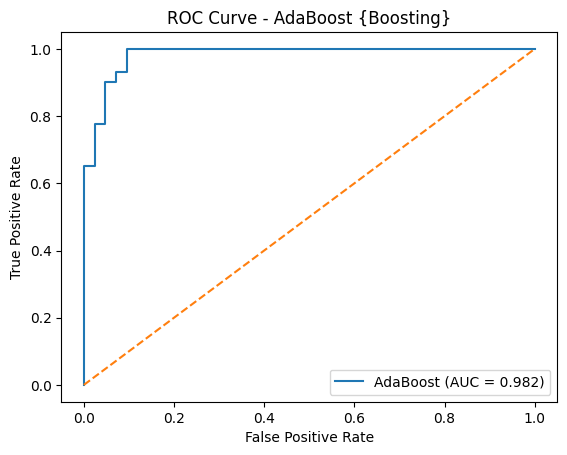

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay,
    roc_curve
)
import matplotlib.pyplot as plt


# 1. Load Dataset
X, y = load_breast_cancer(return_X_y=True)


# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# 3. Build Boosting model
base_model = DecisionTreeClassifier(max_depth=1)

ada_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)


# 4. Train Model
ada_model.fit(X_train, y_train)


# 5. Predictions
y_pred = ada_model.predict(X_test)
y_prob = ada_model.predict_proba(X_test)[:, 1]


# 6. Evaluation
print("===== AdaBoost Performance =====")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# 7. Cross Validation
cv_scores = cross_val_score(ada_model, X, y, cv=5)

print("\nCross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


# 8. Compare with single Weak Learner
single_model = DecisionTreeClassifier(max_depth=1, random_state=42)
single_model.fit(X_train, y_train)

single_pred = single_model.predict(X_test)
single_prob = single_model.predict_proba(X_test)[:, 1]

print("\n===== Single Weak Learner Performance =====")
print("Accuracy :", accuracy_score(y_test, single_pred))
print("Precision:", precision_score(y_test, single_pred))
print("Recall   :", recall_score(y_test, single_pred))
print("F1 Score :", f1_score(y_test, single_pred))
print("ROC-AUC  :", roc_auc_score(y_test, single_prob))


# 9. ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AdaBoost (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost {Boosting}")
plt.legend()
plt.show()
